<a href="https://colab.research.google.com/github/Followb1ind1y/Machine_Learning_Algorithms_from_Scratch/blob/main/ML_Algorithms_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Algorithms: Naive Bayes**

## **Naive Bayes Basics**

**Naive Bayes** classifiers are linear classifiers that are known for being simple yet very efficient. The probabilistic model of naive Bayes classifiers is based on **Bayes' theorem**, and the adjective naive comes from the assumption that **the features in a dataset are mutually independent**. In practice, the independence assumption is often violated, but naive Bayes classifiers still tend to perform very well under this unrealistic assumption. Especially for small sample sizes, naive Bayes classifiers can outperform the more powerful alternatives. However, **strong violations of the independence assumptions** and **non-linear classification problems** can lead to very **poor performances** of naive Bayes classifiers.

From Bayes' Rule, we have:

$$
P(Y=k|X=x) = \frac{p(X=x|Y=k)P(Y=k)}{P(X=x)} = \frac{\pi_{k}f_{k}(x)}{\sum_{l=1}^{K}\pi_{l}f_{l}(x)}
$$

Where density is $f_{k}(X) = P(X=x|Y=k)$ and prior probability of class $k$ is $\pi_{k} = P(Y=k)$.

Conditional on class $k$, assume the variables $x_{j}$ are independent:

$$
f_{k}(x)= \prod_{j=1}^{p}f_{kj}(x_{j})
$$

Where $p$ is the number of $x$‐variables.


Plugging the density into Bayes rule, we obtain:

$$
P(Y=k|X=x) = \frac{\pi_{k}f_{k}(x)}{\sum_{l=1}^{K}\pi_{l}f_{l}(x)}=\frac{\pi_{k}\prod_{j=1}^{p}f_{kj}(x_{j})}{\sum_{l=1}^{K}\pi_{l}\prod_{j=1}^{p}f_{lj}(x_{j})}
$$

The denominator does not depend on class $k$. It is a constant. To find the class that maximizes the posterior probability, we can ignore the denominator:

$$
P(Y=k|X=x) \propto \pi_{k}\prod_{j=1}^{p}f_{kj}(x_{j})
$$

Where $j=1,...,p$ indexes x‐variables.

Typically, estimate the prior probability as the fraction of time the class occurs in the training data:

$$
\pi_{k} = P(Y=k) = \frac{n_{k}}{n}
$$

Estimate the probability as:

$$
f_{kj}(x_{j}) = P(X_{j}=x_{j}|Y=k) = \frac{n_{kj}}{n_{k}}
$$

Where $n_{k}$ is the number of obs in class $k$. Where $n_{kj}$ is the number of obs in class $k$ taking the value $x_{j}$

Predict the class $k$ that maximizes the posterior probability (**Decision rule**):

$$
h(x) = \arg\max_{k}(P(Y=k)\prod_{j=1}^{p}P(X_{j}=x_{j}|Y=k) = argmax_{k}(\pi_{k}\prod_{j=1}^{p}f_{kj}(x_{j}))
$$

When there are many $x$‐variables, multiplying many small probabilities may result in an "underflow". Numerically, all posterior probabilities are 0. It is unclear which 0 is "largest". We can take the log to avoid this problem. Because it is a monotone function, taking the log does not change which class $k$ gives the maximum posterior probability:

$$
h(x) = \arg\max_{k}(log(\pi_{k}) + \sum_{j=1}^{p}log[f_{kj}(x_{j})])
$$

## **Gaussian Naive Bayes**

Gaussian Naive Bayes classifier assumes that the likelihoods are Gaussian:

$$
f_{kj}(x_{j}) = P(X_{j}=x_{j}|Y=k) =\frac{1}{\sqrt{2\pi\sigma_{jk}^{2}}}exp[\frac{-(x_{j}-\mu_{jk})^{2}}{2\sigma_{jk}}]
$$

Maximum likelihood estimate of parameters are:

$$
\begin{align*}
\mu_{jk} &= \frac{\sum_{n=1}^{N}I[Y^{(n)}=k]\cdot x_{j}^{(n)}}{\sum_{n=1}^{N}I[Y^{(n)}=k]} \\
\sigma_{jk} &= \frac{\sum_{n=1}^{N}I[Y^{(n)}=k]\cdot (x_{j}^{(n)}-\mu_{jk})^{2}}{\sum_{n=1}^{N}I[Y^{(n)}=k]} \\
\end{align*}
$$

For any point $(x1,x2)$ we compute the Gaussian Naive Bayes objective function for each class :

$$
\begin{align*}
h(x) &= argmax_{k}[P(Y=k)\prod_{j=1}^{2}P(X_{j}=x_{j}|Y=k)] \\
&= argmax_{k}[P(X_{1}=x_{1}|Y=k)P(k)\cdot P(X_{2}=x_{2}|Y=k)P(k)] \\
&= argmax_{k}[\phi(x_{1}|\mu_{x_{1}|k},\sigma_{x_{1}|k}^{2})P(k)\cdot \phi(x_{2}|\mu_{x_{2}|k},\sigma_{x_{2}|k}^{2})P(k)] \\
\end{align*}
$$

where $\phi(x_{1}|\mu_{x_{1}|k},\sigma_{x_{1}|k}^{2})$ is the PDF of a Gaussian univariate distribution with parameters $\mu_{x_{1}|k}$, $\sigma_{x_{1}|k}^{2}$. Repeat this calculation for each class, and then predict the class which has the highest value.

## **Dataset Initialization**

In [101]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
np.random.seed(0)

# radius of the circle
circle_r = 1

# center of the circle (x, y)
circle_x_1, circle_y_1 = 2, 3
circle_x_2, circle_y_2 = 3, 1.5
circle_x_3, circle_y_3 = 4.5, 2.5

# random angle
alpha_1 = 2 * np.math.pi * np.random.rand(50, 1) 
alpha_2 = 2 * np.math.pi * np.random.rand(50, 1) 
alpha_3 = 2 * np.math.pi * np.random.rand(50, 1) 

# random radius
r_1 = circle_r * np.sqrt(np.random.rand(50, 1))
r_2 = circle_r * np.sqrt(np.random.rand(50, 1))
r_3 = circle_r * np.sqrt(np.random.rand(50, 1))

# calculating coordinates
x_1, y_1 = r_1 * np.cos(alpha_1) + circle_x_1, r_1 * np.sin(alpha_1) + circle_y_1
x_2, y_2 = r_2 * np.cos(alpha_2) + circle_x_2, r_2 * np.sin(alpha_2) + circle_y_2
x_3, y_3 = r_3 * np.cos(alpha_3) + circle_x_3, r_3 * np.sin(alpha_3) + circle_y_3

In [103]:
class_1, class_2, class_3 = np.concatenate((x_1, y_1), axis=1), np.concatenate((x_2, y_2), axis=1), np.concatenate((x_3, y_3), axis=1)
zeros, ones, twos = np.zeros((50,1)), np.ones((50,1)), np.ones((50,1))*2
x = np.concatenate((class_1, class_2, class_3), axis=0)
y = np.concatenate((zeros, ones, twos), axis=0).ravel()

Text(0, 0.5, 'Y')

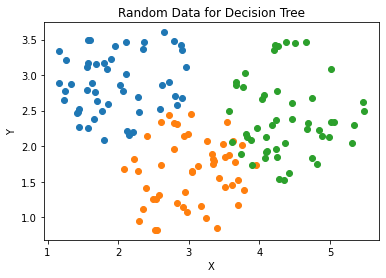

In [104]:
fig, ax = plt.subplots() 
ax.scatter(x[:,0][y==0], x[:,1][y==0])
ax.scatter(x[:,0][y==1], x[:,1][y==1])
ax.scatter(x[:,0][y==2], x[:,1][y==2])
ax.set_title('Random Data for Decision Tree')
ax.set_xlabel('X') 
ax.set_ylabel('Y')

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

## **Implementing Naive Bayes from scratch**

In [106]:
import scipy.stats
from scipy.stats import norm

In [107]:
class NaiveBayes:
    def fit(self, x, y):
        self.N = x.shape[0]
        self.classes = len(set(y))
        self.mu_list = [np.mean([x[:,][y == i] for i in range(len(set(y)))][j], axis=0) for j in range(len(set(y)))]
        self.std_list = [np.std([x[:,][y == i] for i in range(len(set(y)))][j], axis=0) for j in range(len(set(y)))]
        self.pi_list = np.array([np.sum(y == i) for i in range(self.classes)]) / self.N
        
    def predict_class(self, x):
        scores_list = []
        for p in range(self.classes):
            score = (norm.pdf(x = x[0], loc = self.mu_list[p][0], scale = self.std_list[p][0]) 
            * norm.pdf(x = x[1], loc = self.mu_list[p][1], scale = self.std_list[p][1]) * self.pi_list[p])
            scores_list.append(score)
        return np.argmax(scores_list)
    
    def predict(self, x):
        return np.array([self.predict_class(p) for p in x])

In [108]:
NB = NaiveBayes()
NB.fit(x_train,y_train)
y_pred = NB.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9736842105263158

In [109]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,levels=np.arange(n_classes + 1)-0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

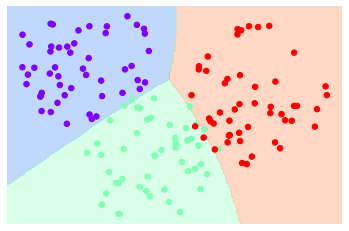

In [110]:
visualize_classifier(NB, x, y)

## **Implementing Naive Bayes from sklearn**

In [111]:
from sklearn.naive_bayes import GaussianNB

In [112]:
modelNB = GaussianNB(priors = None)
modelNB.fit(x_train,y_train)
y_pred = modelNB.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9736842105263158

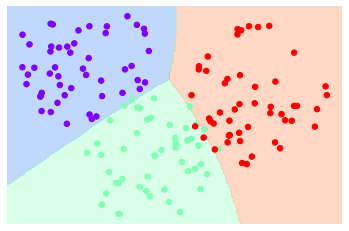

In [113]:
visualize_classifier(modelNB, x, y)

## **Reference**

* Sicotte, X. B. (2018, June 22). Xavier Bourret Sicotte. Gaussian Naive Bayes Classifier: Iris data set - Data Blog. Retrieved January 24, 2023, from `https://xavierbourretsicotte.github.io/Naive_Bayes_Classifier.html#Miscellaneous` 

In [114]:
%%shell
jupyter nbconvert --to html ML_Algorithms_Naive_Bayes.ipynb

[NbConvertApp] Converting notebook ML_Algorithms_Naive_Bayes.ipynb to html
[NbConvertApp] Writing 326837 bytes to ML_Algorithms_Naive_Bayes.html
